In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv


### Goal is to predict the customer is exiting the bank or not

## Load and Clean the data

In [2]:
import pandas as pd
import numpy as np

In [3]:
bank_df = pd.read_csv('/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv')

In [4]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bank_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Deleting the unwanted columns

bank_df.drop(columns = ['RowNumber', 'CustomerId', 'CreditScore'], inplace=True)

In [7]:
bank_df.drop(['Surname'], axis = 1)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
bank_df.sample(4)

,Surname,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8703,Fermin,France,Female,31,3,136067.82,2,1,0,65567.91,0
2626,Genovese,Germany,Female,29,2,129177.01,2,0,1,104617.99,0
8508,Wang,Spain,Male,27,2,0.00,2,1,1,13221.25,0
8189,Ch'eng,France,Male,21,8,0.00,2,1,0,68666.63,0


Check if there are any null values in the dataframe

In [9]:
bank_df.isna().sum()

Surname            0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
bank_df.columns.unique()

Index(['Surname', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Check for categorical and numerical values inside the dataframe, if some features have categorical value then convert them to numerical values so that the model can perform operations on them

In [11]:
bank_df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
bank_df = bank_df.replace({'Female': 1, 'Male': 0})

Now the cat values have been converted to numerical values 

In [14]:
bank_df.Gender.unique()

array([1, 0])

In [15]:
bank_df.sample(3)

,Surname,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7422,Wright,France,0,29,7,101486.96,1,1,1,8788.35,0
1999,Enderby,Germany,0,43,3,144164.29,1,1,1,158646.46,0
1576,Niu,France,1,40,9,95624.36,2,1,1,60706.33,0


Do the same for all the columns which have categorical values

In [16]:
bank_df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
pd.get_dummies(data = bank_df, columns = ['Geography'])

,Surname,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,Hargrave,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,Hill,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,Onio,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,Boni,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,Mitchell,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,0,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,Johnstone,0,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,Liu,1,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,Sabbatini,0,42,3,75075.31,2,1,0,92888.52,1,False,True,False


We want integer 1 and 0 not the boolean true and false, so explicitly convert the valus into integer

In [18]:
dummies = pd.get_dummies(data = bank_df['Geography']).astype(int)

In [19]:
dummies

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [20]:
bank_df = pd.concat([bank_df.drop(['Geography'], axis=1), dummies], axis = 1)

Now we dropped geography column and added three encoded attributes inside the geography as columns

In [21]:
bank_df

,Surname,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,Hargrave,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,Hill,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,Onio,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,Boni,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,Mitchell,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,Johnstone,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,Liu,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,Sabbatini,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [ ]:
bank_df.drop(columns = ['Surname'], inplace = True)

In [31]:
bank_df.dtypes

Gender             int64
Age                int64
Tenure             int64
Balance            int64
NumOfProducts      int64
HasCrCard          int64
IsActiveMember     int64
EstimatedSalary    int64
Exited             int64
France             int64
Germany            int64
Spain              int64
dtype: object

## Normalization
we have to bring all the values to a specific range of values

### Create target and features

In [36]:
X = bank_df.drop('Exited', axis=1)

In [37]:
y = bank_df['Exited']

In [40]:
bank_df.shape

(10000, 12)

The splitted would look like this

In [41]:
X.shape, y.shape, X.columns

((10000, 11),
 (10000,),
 Index(['Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'France', 'Germany', 'Spain'],
       dtype='object'))

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[:]= scaler.fit_transform(X)

Scaled values of all the features

In [45]:
X.head()

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,1,0.324324,0.2,0.000000,0.000000,1,1,0.506733,1,0,0
1,1,0.310811,0.1,0.334028,0.000000,0,1,0.562708,0,0,1
2,1,0.324324,0.8,0.636354,0.666667,1,0,0.569654,1,0,0
3,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0
4,1,0.337838,0.2,0.500243,0.000000,1,1,0.395403,0,0,1


In [48]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

## Building the model

In [50]:
import tensorflow as tf
from tensorflow import keras

2025-11-18 07:31:48.477626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763451108.684295      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763451108.745358      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [56]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape = (11,), activation='sigmoid')
])

model.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [57]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2661 - loss: 1.0479
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6233 - loss: 0.6447
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7748 - loss: 0.5365
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7916 - loss: 0.5067
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.4975
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7895 - loss: 0.4968
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.4842
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7925 - loss: 0.4882
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.4765
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7850 - loss: 0.4920
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.4790
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [60]:
loss, acc = model.evaluate(X_test, y_test)
acc * 100

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8022 - loss: 0.4249


81.40000104904175

### Building multi layer perceptron

In [61]:
model = keras.Sequential([
    keras.layers.Dense(32, input_shape = (11,), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),

    # OUTput LAYER
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
callback = keras.callbacks.EarlyStopping()

model.fit(X_train, y_train, epochs = 100, batch_size=50, callbacks=[callback])

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.3167
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8682 - loss: 0.3219
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8723 - loss: 0.3100
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8723 - loss: 0.3125
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8661 - loss: 0.3245
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.3143
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.3243
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8723 - loss: 0.3088
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8756 - loss: 0.3120
Epoch 10/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8742 - loss: 0.3123
Epoch 11/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8759 - loss: 0.3079
Epoch 12/100
160/160 ━━━━━━━━━━━━━━━━━━━━

In [65]:
loss, acc = model.evaluate(X_test, y_test)
acc * 100

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.3402


86.10000014305115

Using early stopping to find the best asccuracy we needed without wasting the space 

In [66]:
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience = 3)

model.fit(X_train, y_train, epochs = 100, batch_size=50, callbacks=[callback])

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8794 - loss: 0.2962
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8810 - loss: 0.2947
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8733 - loss: 0.2987
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8807 - loss: 0.2882


In [67]:
loss, acc = model.evaluate(X_test, y_test)
acc * 100

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.3451


85.9499990940094

In [70]:
pred = model.predict(X_test)
binary_pred = (pred > 0.5).astype(int)
binary_pred[10:15]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1],
       [1],
       [1],
       [0],
       [0]])

In [71]:
y_test[10:15]

2750    1
7487    1
5272    1
5653    0
3999    0
Name: Exited, dtype: int64

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, binary_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1607
           1       0.69      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



This dataset is highly imbalance, as you can see in f1-score 0 is high but 1 is very low

In [73]:
bank_df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Lets balance the whole dataset

In [79]:
pip install --upgrade imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [80]:
pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 46.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.14.0 requires scikit-learn<2,>=1.4.2, but you have scikit-learn 1.2.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X, y = smote.fit_transform(X)

## Using dropout layer to stop overfitting

In [84]:
model = keras.Sequential([
    keras.layers.Dense(32, input_shape = (11,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),

    # OUTput LAYER
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7811 - loss: 0.5533
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7971 - loss: 0.4871
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.4798
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7896 - loss: 0.4864
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.4756
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8002 - loss: 0.4611
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4576
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8026 - loss: 0.4561
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8044 - loss: 0.4422
Epoch 10/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: 0.4462
Epoch 11/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8146 - loss: 0.4351
Epoch 12/100
160/160 ━━━━━━━━━━━━━━━━━━━━

In [85]:
loss, acc = model.evaluate(X_test, y_test)
acc * 100

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8590 - loss: 0.3411 


86.19999885559082

<Axes: >

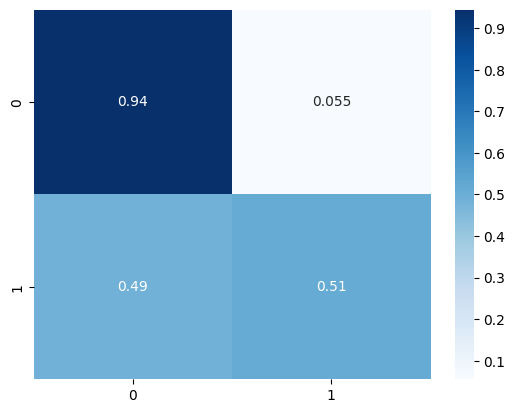

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf = confusion_matrix(y_test, binary_pred, normalize = 'true')

sns.heatmap(cf, cmap='Blues', annot=True)
